In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as offline
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import  iplot
import os, psutil
%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

In [ ]:
DATA_URL = 'https://data.cdc.gov/resource/haed-k2ka.json'
res = requests.get(DATA_URL).json()

In [2]:
df = pd.DataFrame(res, columns=['state_not_geocoded', 'alcohol_impaired_driving_deaths', 'occupant_deaths', 'state'])
df.rename(columns={'state_not_geocoded': 'states', 'alcohol_impaired_driving_deaths': 'alch_impared_deaths', 'state':'address'}, inplace=True)

NameError: name 'res' is not defined

In [3]:
casted_types = {'states': str,
                'alch_impared_deaths': int,
                'occupant_deaths': int
               }
df = df.astype(casted_types)


NameError: name 'df' is not defined

In [4]:
# df.plot(kind='bar',x='states',y='alch_impared_deaths')
# ax = plt.gca()
# df.plot(kind='line',x='states',y='alch_impared_deaths',ax=ax)
# df.plot(kind='line',x='states',y='occupant_deaths', color='red', ax=ax,figsize=(16,6))
# plt.show()


NameError: name 'df' is not defined

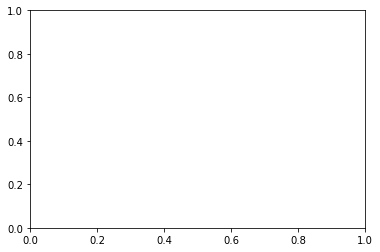

In [5]:
## Occupants death per state
ax = plt.gca()
df.plot(kind='barh', x='states', y='occupant_deaths', ax=ax, figsize=(16,10), title='Occupant deaths per state')
plt.show()

In [7]:
## Alcohol impared deaths per state
fig = px.funnel(df.sort_values('alch_impared_deaths', ascending=False), x='alch_impared_deaths', y='states')
fig.show()


NameError: name 'px' is not defined

In [8]:
## Deaths per state side by side
fig = go.Figure(data=[
    go.Bar(name='Alcohol Deaths', x=df.states, y=df.alch_impared_deaths),
    go.Bar(name='Occupant Deaths', x=df.states, y=df.occupant_deaths)
])
fig.update_layout(barmode='group')
fig.show(title='Deaths per state')

NameError: name 'go' is not defined

In [9]:
## Total deaths per state option 1
dfd = px.data.tips()
fig = px.histogram(dfd, x=df.states, y=df.alch_impared_deaths+df.occupant_deaths, title='Total deaths per state')
fig.show()

NameError: name 'px' is not defined

In [10]:
## Total deaths per state option 2
dfd = px.data.wind()
fig = px.scatter_polar(dfd, r=df.alch_impared_deaths+df.occupant_deaths, theta=df.states)
fig.show()

NameError: name 'px' is not defined

In [11]:
## Interactive state wise deaths map
plotting_data = dict(type='choropleth',
            locations = df.states,
            locationmode = 'USA-states',
            colorscale = 'Reds',
            z = df.alch_impared_deaths+df.occupant_deaths,
            colorbar = {'title':"Number of deaths"}
                    )
layout = dict(title = 'Occupant and Alcohol-Impaired Driving Deaths in States',
              geo = dict(scope='usa')
             )

In [12]:
choromap = go.Figure(data = [plotting_data],layout = layout)
iplot(choromap)

NameError: name 'go' is not defined